# NBA Analysis

Standard imports

In [6]:
import pandas as pd
import numpy as np
import requests
from nba_api.stats import endpoints
from matplotlib import pyplot as plt
from nba_api.stats.endpoints import leaguedashplayerstats
from nba_api.stats.endpoints import leaguedashplayerbiostats


### Finding all active players, their height in inches, and points for the 2020-2021 Season

In [3]:
playerbiostats = leaguedashplayerbiostats.LeagueDashPlayerBioStats()
playerbiostats.get_data_frames()[0]

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,PLAYER_HEIGHT,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,COLLEGE,COUNTRY,...,GP,PTS,REB,AST,NET_RATING,OREB_PCT,DREB_PCT,USG_PCT,TS_PCT,AST_PCT
0,203932,Aaron Gordon,1610612743,DEN,25.0,6-8,80,235,Arizona,USA,...,50,618,284,161,2.1,0.055,0.150,0.204,0.547,0.165
1,1628988,Aaron Holiday,1610612754,IND,24.0,6-0,72,185,UCLA,USA,...,66,475,89,123,-0.2,0.012,0.060,0.189,0.503,0.139
2,1630174,Aaron Nesmith,1610612738,BOS,21.0,6-5,77,215,Vanderbilt,USA,...,46,218,127,23,-0.5,0.041,0.146,0.133,0.573,0.047
3,1627846,Abdel Nader,1610612756,PHX,27.0,6-5,77,225,Iowa State,Egypt,...,24,160,62,19,5.0,0.020,0.151,0.183,0.605,0.078
4,1629690,Adam Mokoka,1610612741,CHI,22.0,6-4,76,190,None,France,...,14,15,5,5,-7.1,0.017,0.077,0.171,0.386,0.179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1627812,Yogi Ferrell,1610612746,LAC,28.0,6-0,72,178,Indiana,USA,...,10,56,19,22,-0.4,0.034,0.095,0.193,0.459,0.229
536,1629139,Yuta Watanabe,1610612761,TOR,26.0,6-9,81,215,George Washington,Japan,...,50,218,159,40,-2.7,0.046,0.171,0.121,0.565,0.079
537,203897,Zach LaVine,1610612741,CHI,26.0,6-5,77,200,UCLA,USA,...,58,1591,289,282,-0.8,0.018,0.121,0.302,0.634,0.225
538,1630192,Zeke Nnaji,1610612743,DEN,20.0,6-9,81,240,Arizona,USA,...,42,136,65,10,-10.5,0.034,0.129,0.126,0.615,0.037


Let's run some standard statistics on height, weight, and points

average height = 78.31296296296296 inches
max height = 89 inches
min height = 69 inches


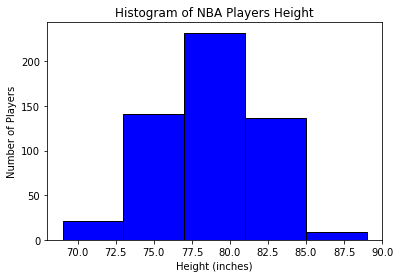

In [58]:
height = playerbiostats.get_data_frames()[0]["PLAYER_HEIGHT_INCHES"]

# matplotlib histogram
plt.hist(height, color = 'blue', edgecolor = 'black',
         bins = 5)

# Add labels
plt.title('Histogram of NBA Players Height')
plt.xlabel('Height (inches)')
plt.ylabel('Number of Players')

print('average height = ' + str(np.mean(height)) + ' inches')
print('max height = ' + str(np.max(height)) + ' inches')
print('min height = ' + str(np.min(height)) + ' inches')

average weight = 217.0 pounds
max weight = 311 pounds
min weight = 160 pounds


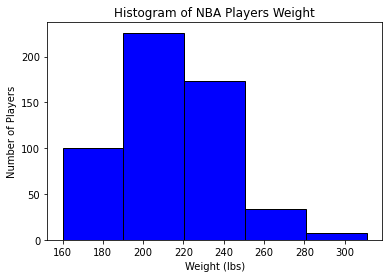

In [59]:
weight = playerbiostats.get_data_frames()[0]["PLAYER_WEIGHT"]

# weight is stored as str? convert to int
weight = pd.to_numeric(weight, errors='coerce')

# matplotlib histogram
plt.hist(weight, color = 'blue', edgecolor = 'black',
         bins = 5)

# Add labels
plt.title('Histogram of NBA Players Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Number of Players')

print('average weight = ' + str(round(np.mean(weight),0)) + ' pounds')
print('max weight = ' + str(np.max(weight)) + ' pounds')
print('min weight = ' + str(np.min(weight)) + ' pounds')

Text(0, 0.5, 'Number of Players')

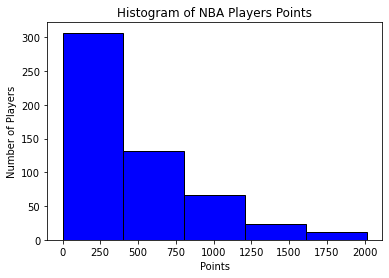

In [60]:
points = playerbiostats.get_data_frames()[0]["PTS"]
# matplotlib histogram
plt.hist(points, color = 'blue', edgecolor = 'black',
         bins = 5)

# Add labels
plt.title('Histogram of NBA Players Points')
plt.xlabel('Points')
plt.ylabel('Number of Players')

Unsurprisingly, height is normally distributed and weight is left skew-distributed.
Points however is highly left skew.

### Graph the relationship between Height and Points Scored

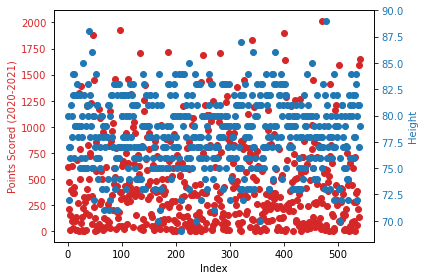

In [40]:
# Create some mock data
index = np.arange(1, 541, 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Points Scored (2020-2021)', color=color)
ax1.scatter(index, points, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Height (inches)', color=color)  # we already handled the x-label with ax1
ax2.scatter(index, height, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#### Well this isn't useful. Lets try to sort the data by height and points ascending and graph again

In [46]:
bio_stats_sorted = playerbiostats.get_data_frames()[0].sort_values(by=['PLAYER_HEIGHT_INCHES', 'PTS'])

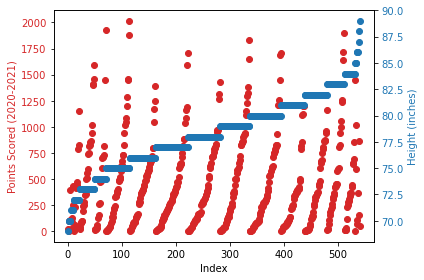

In [54]:
height = bio_stats_sorted["PLAYER_HEIGHT_INCHES"]
points = bio_stats_sorted["PTS"]
average_points = bio_stats_sorted["PTS"].mean()

# Create some mock data
index = np.arange(1, 541, 1)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Index')
ax1.set_ylabel('Points Scored (2020-2021)', color=color)
ax1.scatter(index, points, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Height (inches)', color=color)  # we already handled the x-label with ax1
ax2.scatter(index, height, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

The majority of players are scoring less than 700 points in the 2020-2021 season. However there are more players scoring higher than 700 points in the lower height category